# Background and Context:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# Objective :

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

# Key Questions:

1) Perform EDA.

2) Apply Clustering Algorithms and mentions how many clusters are formed ?

3) How are these segments different from each other?

4) What are your recommendations to the bank on how to better market to and service these customers?

# Data Dictionary:

 1. Sl_No    - Serial No .           
 2. Customer Key  - Customer ID .       
 3. Avg_Credit_Limit  - Avg spending on credit cards.  
 4. Total_Credit_Cards  - Total No of credit cards by the customer. 
 5. Total_visits_bank   - Total visits to bank by the customer.    
 6. Total_visits_online  - Total no of visits via online.
 7. Total_calls_made - Totalno of calls made.

# Import neccesary Libaries :

In [60]:
import warnings

warnings.filterwarnings("ignore")

#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
#from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 


In [2]:
data = pd.read_csv("Credit Card Customer Data.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- There are total 7 columns and 660 observations in the dataset
- All the columns are of integer type . As observed , there is no missing values in the dataset.

In [6]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [7]:
#dropping the serial no. column as it does not hold any statistical significance
df.drop('Sl_No',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [9]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [10]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


**Observations**
- Median of Total_Credit_Cards is 5 indicating most of the customers at the most have 5 credit cards.

In [11]:
# let us look at the shape of the data
df.shape

(660, 6)

In [12]:
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no missing values in our data

# EDA

### Univariate Analysis

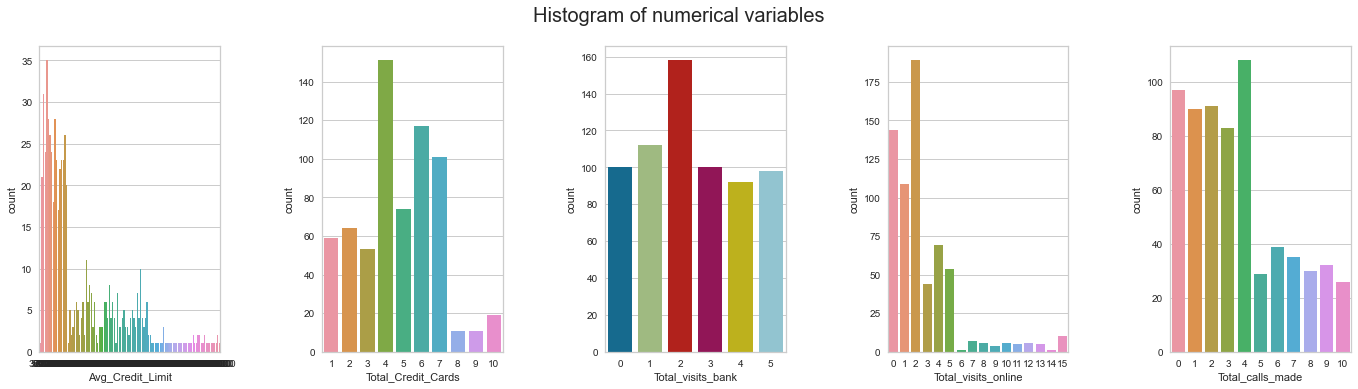

In [13]:
all_col = df.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=4.0)

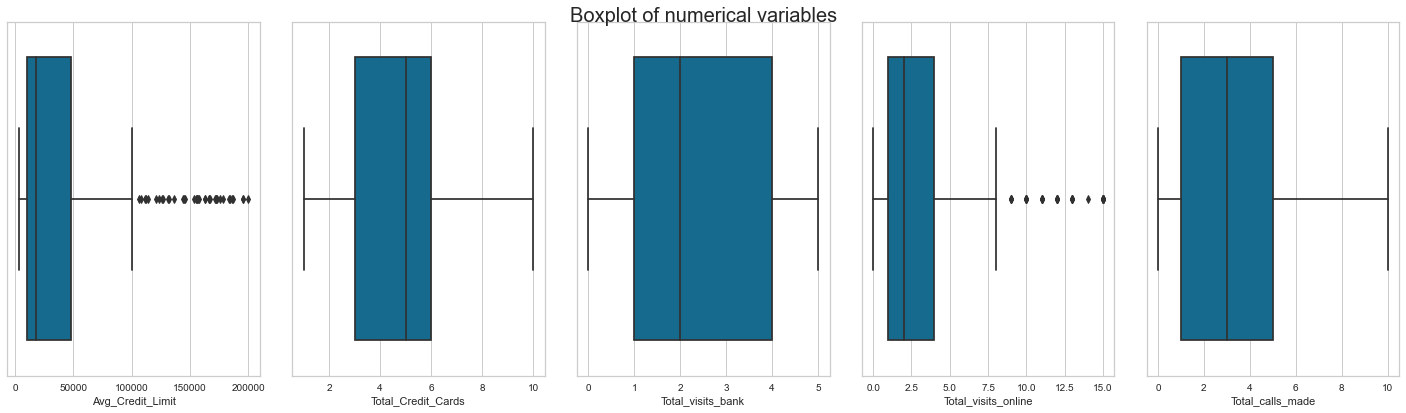

In [14]:
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**
- 50 % of colleges have rating off 2 and 3
- 50 % of colleges have fees high or very high
- 75 % of colleges have rating less than 4 in placements
- 75 % of colleges have 3 more rating in infrastructure

# Heatmap:

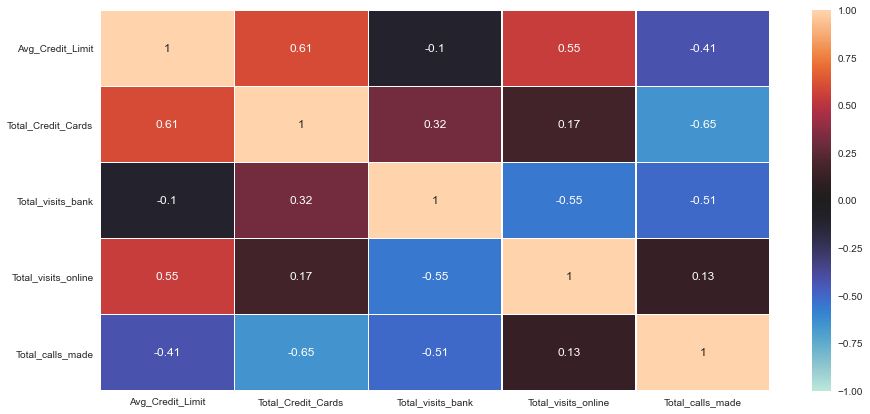

In [15]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

In [16]:
!conda install -c districtdatalabs yellowbrick --yes

Solving environment: done

# All requested packages already installed.



In [17]:
!pip install yellowbrick

In [18]:
pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in ./opt/anaconda3/lib/python3.8/site-packages (1.3.post1)
Note: you may need to restart the kernel to use updated packages.


### Lets make pairplots

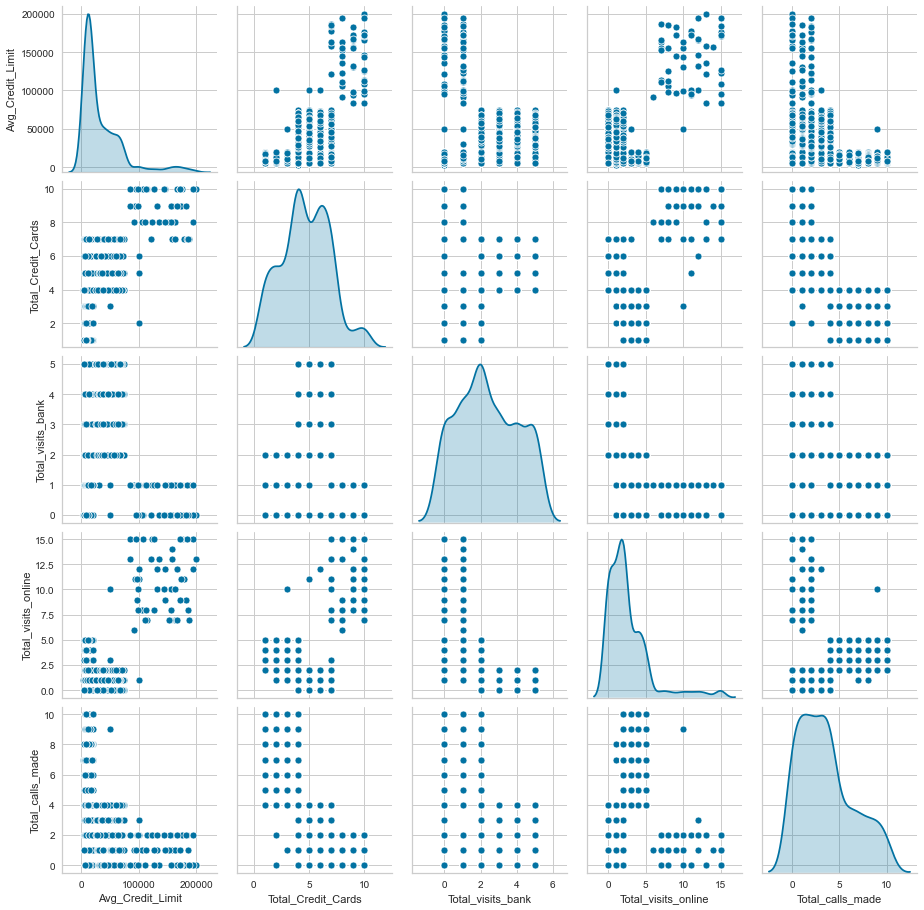

In [19]:
sns.pairplot(df[all_col],diag_kind="kde")

# Data Preprocessing:

In [ ]:
# lets check duplicate observations
df.duplicated().sum()

# Remove Duplicates:

In [ ]:
df = df[(~df.duplicated())].copy()

In [80]:
df.duplicated().sum()

0

In [81]:
# checking missing values
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
K_means_segments       0
HC_Clusters            0
dtype: int64

In [83]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)

In [21]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.354661446118897
Number of Clusters: 2 	Average Distortion: 1.6647146413553036
Number of Clusters: 3 	Average Distortion: 1.3692842976902195
Number of Clusters: 4 	Average Distortion: 1.0523031067230086
Number of Clusters: 5 	Average Distortion: 0.9959165388906415
Number of Clusters: 6 	Average Distortion: 0.953410833179711
Number of Clusters: 7 	Average Distortion: 0.9169172320320539
Number of Clusters: 8 	Average Distortion: 0.8997827490154862


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

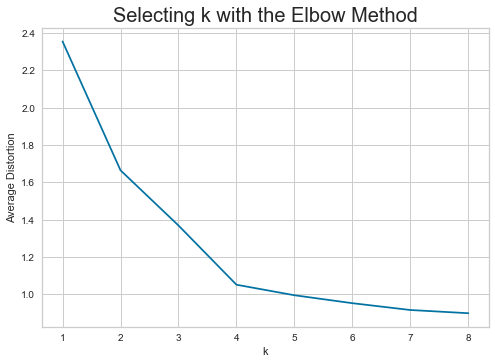

In [84]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

The appropriate value of k from elbow curve seems to be 3 , 4 or 5

### Lets us check silhoutte score

In [85]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4350169564449969)
For n_clusters = 3, silhouette score is 0.5173466255140974)
For n_clusters = 4, silhouette score is 0.5083760071019212)
For n_clusters = 5, silhouette score is 0.4093954493120434)
For n_clusters = 6, silhouette score is 0.3390605455671544)
For n_clusters = 7, silhouette score is 0.3169430380334455)
For n_clusters = 8, silhouette score is 0.2262427512375886)
For n_clusters = 9, silhouette score is 0.25229792981856514)


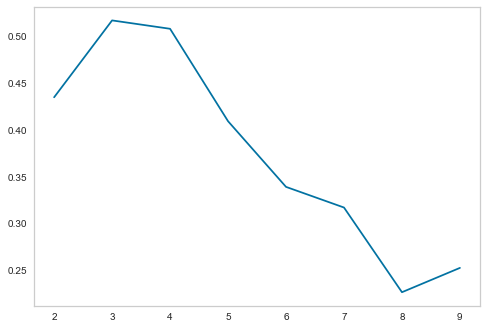

In [86]:
plt.plot(cluster_list,sil_score)
plt.grid()

* From silhouette score, it seems that 4 is good value of k.

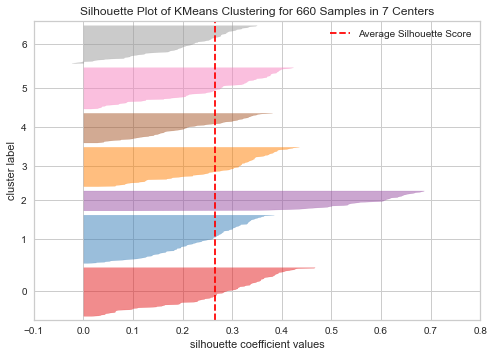

In [87]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

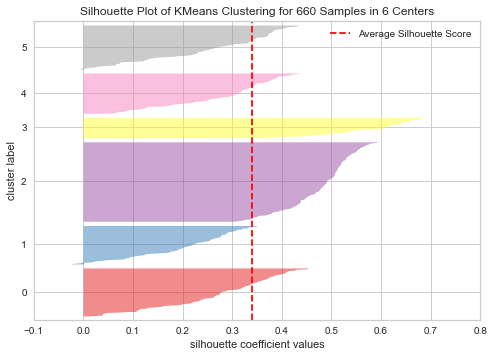

In [88]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

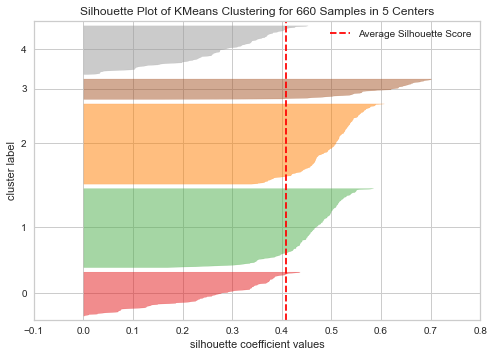

In [91]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

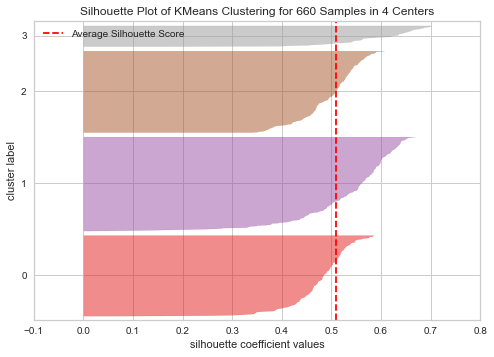

In [90]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

### Let us take 4 as appropriate no. of clusters as silhoutte score is high enough. 

In [92]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df['K_means_segments'] = kmeans.labels_

In [31]:
cluster_profile = df.groupby('K_means_segments').mean()

In [32]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [94]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,0.017778,225
1,38298.429319,5.670157,2.523560,0.947644,2.099476,1.073298,191
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,29474.226804,5.365979,4.448454,1.010309,1.891753,2.886598,194


In [34]:
#dropping the Customer Key. column as it does not hold any statistical significance
df.drop('Customer Key',axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   K_means_segments     660 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 28.5 KB


In [37]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)

In [38]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429729463461747
Number of Clusters: 7 	Average Distortion: 0.9095137283638062
Number of Clusters: 8 	Average Distortion: 0.889538190885164


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

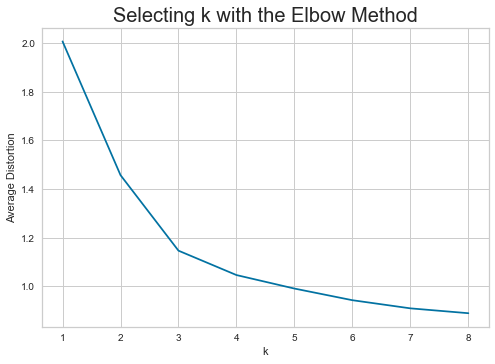

In [39]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

The appropriate value of k from elbow curve seems to be 3 , 4 or 5

### Lets us check silhoutte score

In [40]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2726698397729061)
For n_clusters = 6, silhouette score is 0.25589934351218274)
For n_clusters = 7, silhouette score is 0.2510685059831865)
For n_clusters = 8, silhouette score is 0.24933178204431425)
For n_clusters = 9, silhouette score is 0.2168498219514413)


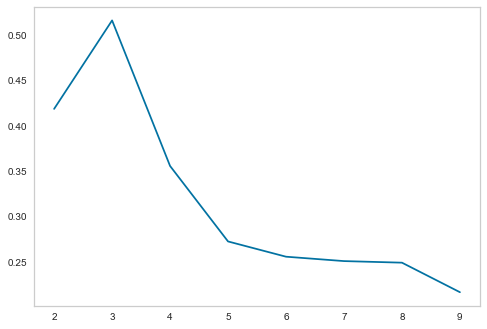

In [41]:
plt.plot(cluster_list,sil_score)
plt.grid()

* From silhouette score, it seems that 3, 4 is good value of k.

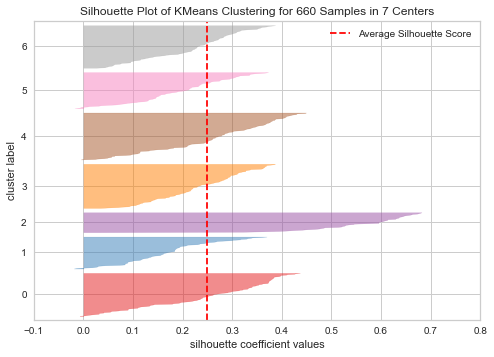

In [42]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

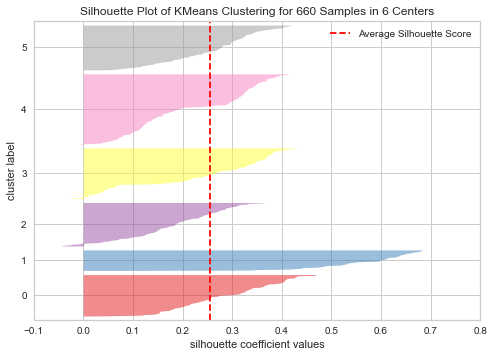

In [43]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

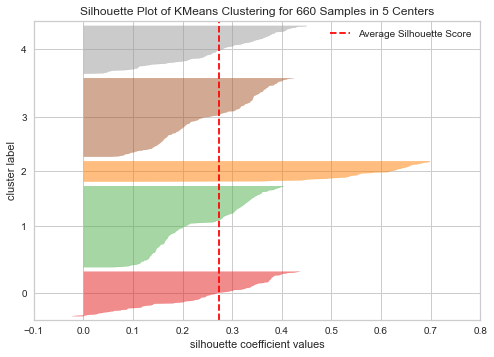

In [44]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

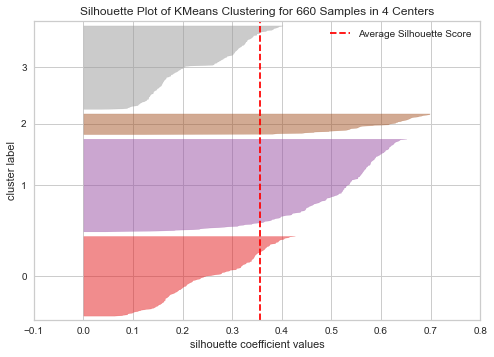

In [45]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

### Let us take 4 as appropriate no. of clusters as silhoutte score is high enough 

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [47]:
df['K_means_segments'] = kmeans.labels_

In [48]:
cluster_profile = df.groupby('K_means_segments').mean()

In [54]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [55]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12167.420814,2.393665,0.927602,3.574661,6.923077,221
1,35904.522613,5.522613,2.477387,0.969849,2.075377,199
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,31226.315789,5.478947,4.515789,1.010526,1.936842,190


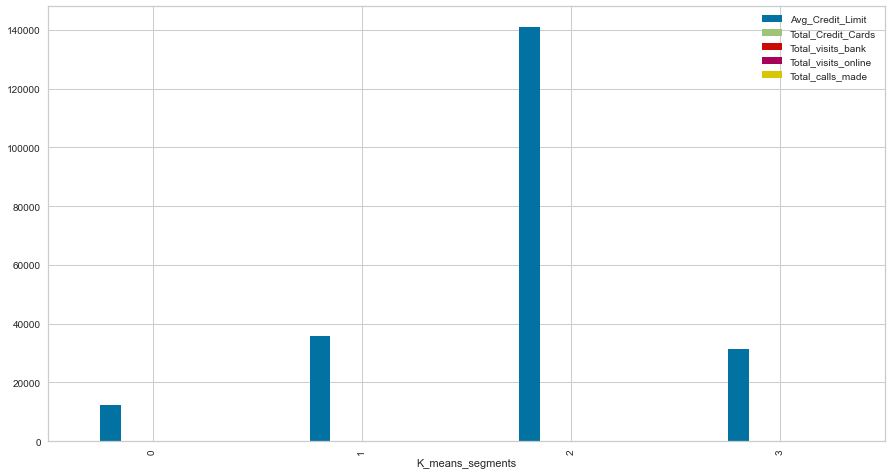

In [56]:
df.groupby('K_means_segments').mean().plot.bar(figsize=(15,8))

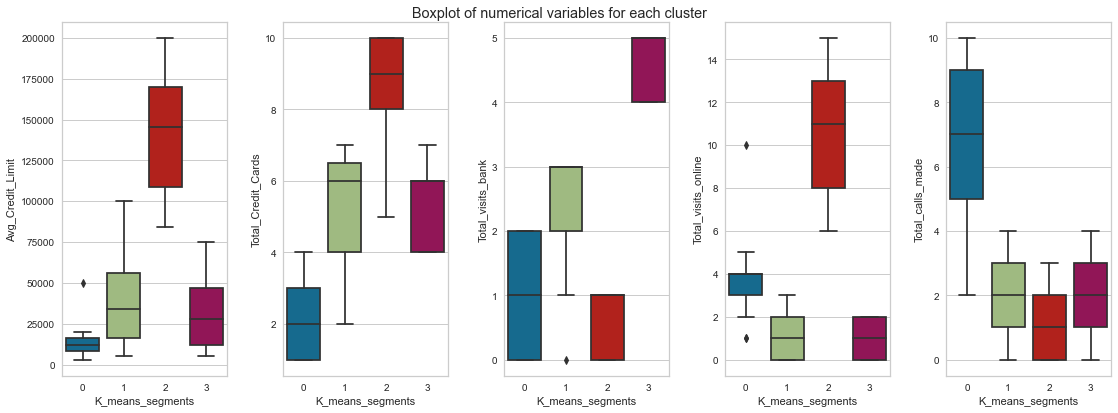

In [76]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster has average credit limit of less than 25,000
    - The total number of credit cards is of 1 to 3 in range 
    - The total visits to the bank is at the most 2 visits we can see  in this cluster 
     - The total visits via online is at the most 4 visits we can see in this cluster.
     - The total calls made ranges from 5 at the minimum upto around 9 calls in this cluster.
   
- **Cluster 1**:
  - This cluster has average credit limit ranges from 25,000 to above 50,000 but less than 75,000.
    - The total number of credit cards range starts at the maxiumum 5 in this cluster.
    - The total visits to the bank ranges between 2 to 3 in this cluster. 
     - The total visits via online is at the most 2 visits we can see in this cluster.
     - The total calls made ranges from 1 to 3 calls in this cluster.
     
    
  **Cluster 2**:
  - This cluster has average credit limit ranges higher than 100000 to 175 0000
    - The total number of credit cards is of 8 to 10 in range.
    - The total visits to the bank is at the most 1 visit only .
     - The total visits via online is at the 8 to 13  we can see in this cluster.
     - The total calls made ranges from 0 at the minimum upto around 2 calls in this cluster.
  
  
  **Cluster 3**:
  - This cluster has average credit limit of about below  50,000 in this cluster.
    - The total number of credit cards is of 4 to 6 in range 
    - The total visits to the bank is at the maximum 5 visits we can see  in this cluster 
     - The total visits via online is at the most 2 visits we can see in this cluster.
     - The total calls made ranges from 1 to 3 calls in this cluster


# Linkage Methods

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            

Cophent correlation for distance metrics euclidean and linkahe method single is 0.7391220243806552
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8599730607972423
Cophent correlation for distance metrics euclidean and linkahe method average is 0.8977080867389372
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.8861746814895477
Cophent correlation for distance metrics chebyshev and linkahe method single is 0.7382354769296767
Cophent correlation for distance metrics chebyshev and linkahe method complete is 0.8533474836336782
Cophent correlation for distance metrics chebyshev and linkahe method average is 0.8974159511838106
Cophent correlation for distance metrics chebyshev and linkahe method weighted is 0.8913624010768603
Cophent correlation for distance metrics mahalanobis and linkahe method single is 0.7058064784553606
Cophent correlation for distance metrics mahalanobis and linkahe method complete is 0.54227912098

In [62]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.8977080867389372, which is obtinaed with euclidean distance metric and average linkage method


### Lets explore 'centroid', 'median','ward' linkage method which requires only Euclidean distance metrics

In [63]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
    print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkahe method single is 0.7391220243806552
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.8599730607972423
Cophent correlation for distance metrics euclidean and linkahe method average is 0.8977080867389372
Cophent correlation for distance metrics euclidean and linkahe method median is 0.8893799537016724
Cophent correlation for distance metrics euclidean and linkahe method ward is 0.7415156284827493
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.8861746814895477
**************************************************************************************************************
Highest cophenet correlation is 0.8977080867389372, which is obtinaed with cityblock distance metric and average linkage method


**Observations**
- We see that cophenet index is maximum with cityblock distance metric with manhattan distance method and average linkage method. 
- Lets see the dendrogram of different linkage method

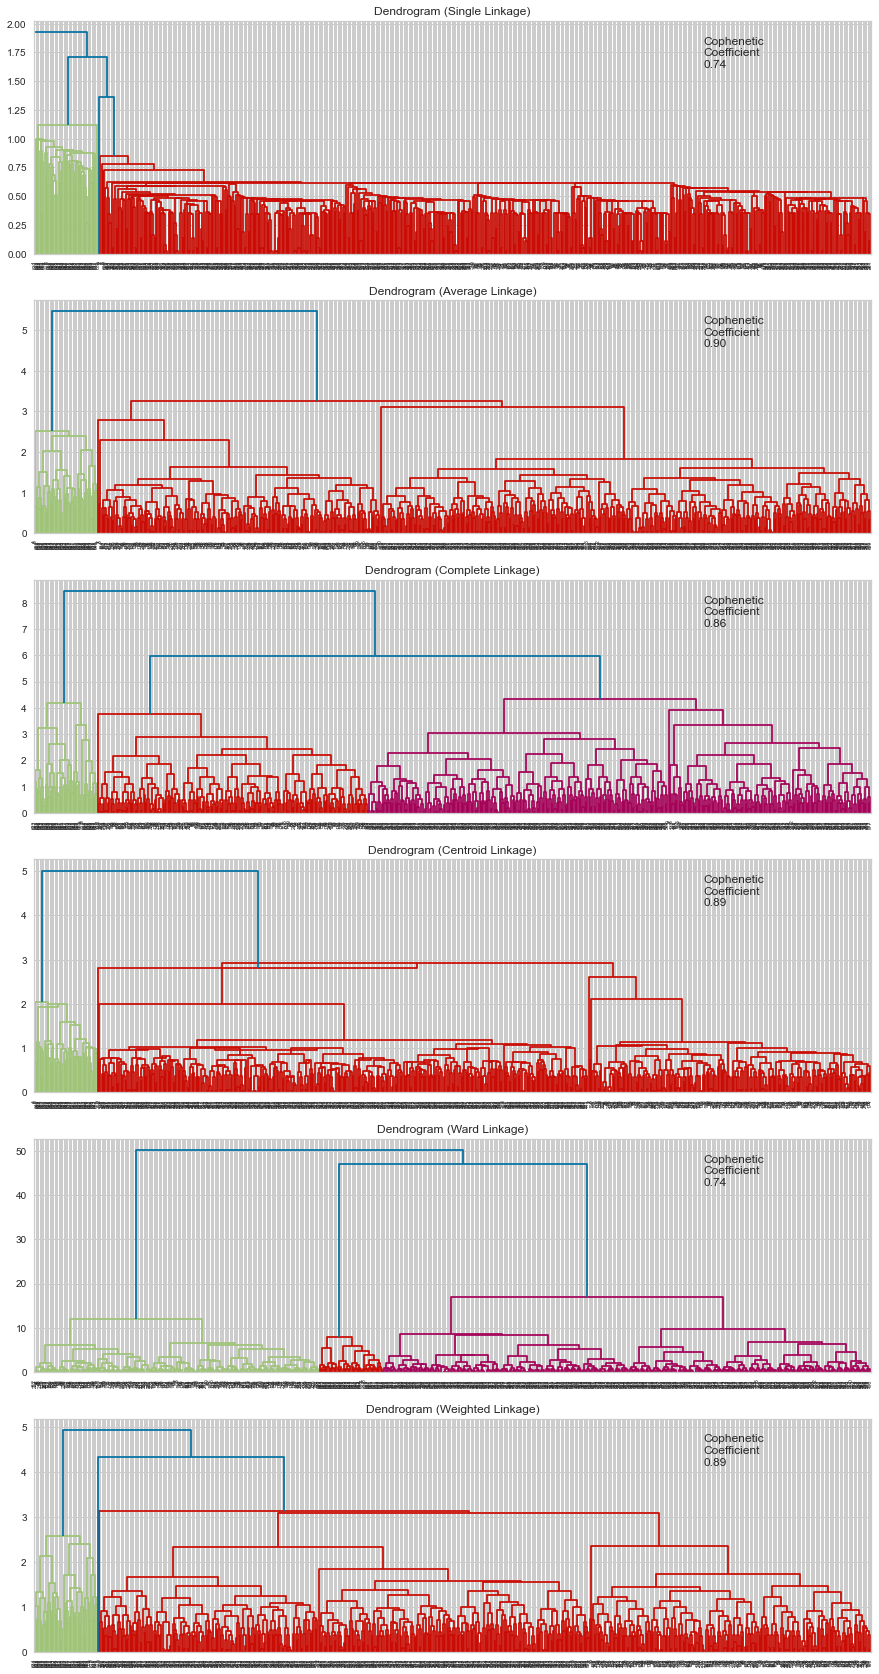

In [64]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

**Observations**
 - Dendrogram with ward linkage method shows distinct and separate cluster compared to other clusters

In [65]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,average,0.897708
2,complete,0.859973
3,centroid,0.893939
4,ward,0.741516
5,weighted,0.886175


- Let us see the dendrogram of 'mahalanobis','cityblock' with 'average', 'weighted' linkage method as they gave high cophenetic correlation value

In [66]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'weighted']

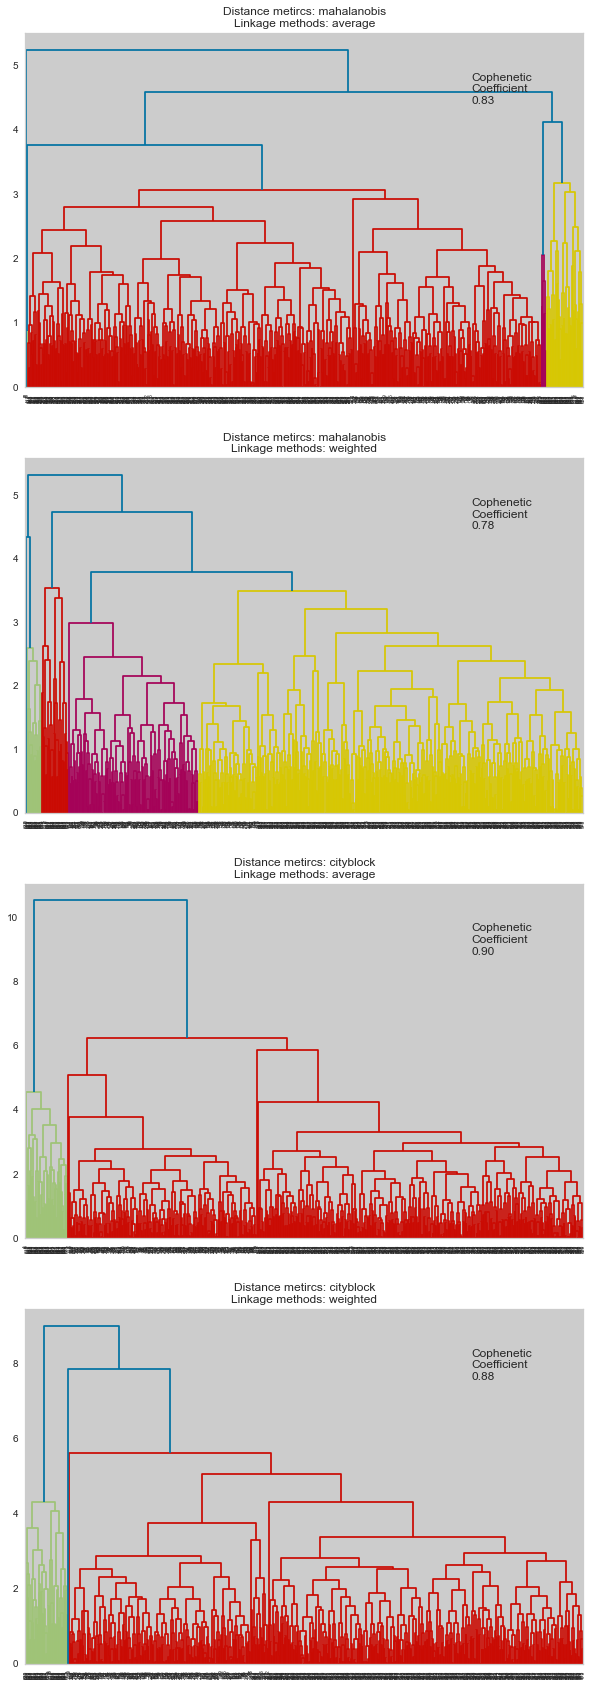

In [67]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

**Observations**
- Out of all the dendrogram we saw, it is clear that dendrogram with ward linkage method gave us separate and distinct clusters
- 4 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

In [69]:
#Trying with K value as 4
HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [70]:
df['HC_Clusters'] = HCmodel.labels_

In [71]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [72]:
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [73]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12151.111111,2.422222,0.937778,3.546667,6.857778,0.017778,225
1,38298.429319,5.670157,2.523560,0.947644,2.099476,1.073298,191
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,29474.226804,5.365979,4.448454,1.010309,1.891753,2.886598,194


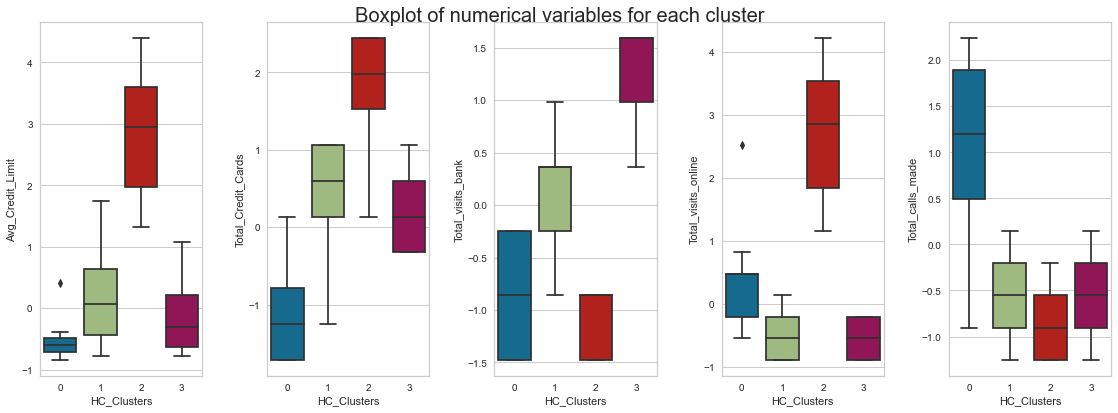

In [74]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

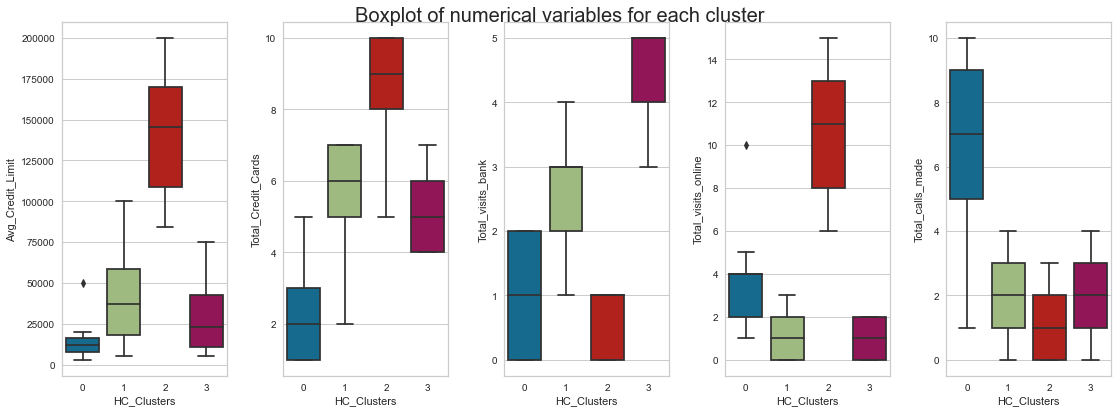

In [75]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster has average credit limit of less than 25,000
    - The total number of credit cards is of 1 to 3 in range 
    - The total visits to the bank is at the most 2 visits we can see  in this cluster 
     - The total visits via online is at the most 4 visits we can see in this cluster.
     - The total calls made ranges from 5 at the minimum upto around 9 calls in this cluster.
   
- **Cluster 1**:
  - This cluster has average credit limit ranges from 25,000 to above 50,000 but less than 75,000.
    - The total number of credit cards range starts at the maxiumum 5 in this cluster.
    - The total visits to the bank ranges between 2 to 3 in this cluster. 
     - The total visits via online is at the most 2 visits we can see in this cluster.
     - The total calls made ranges from 1 to 3 calls in this cluster.
     
    
  **Cluster 2**:
  - This cluster has average credit limit ranges higher than 100000 to 175 0000
    - The total number of credit cards is of 8 to 10 in range.
    - The total visits to the bank is at the most 1 visit only .
     - The total visits via online is at the 8 to 13  we can see in this cluster.
     - The total calls made ranges from 0 at the minimum upto around 2 calls in this cluster.
  
  
  **Cluster 3**:
  - This cluster has average credit limit of about below  50,000 in this cluster.
    - The total number of credit cards is of 4 to 6 in range 
    - The total visits to the bank is at the maximum 5 visits we can see  in this cluster 
     - The total visits via online is at the most 2 visits we can see in this cluster.
     - The total calls made ranges from 1 to 3 calls in this cluster


In [95]:
pd.crosstab(df['HC_Clusters'], df.Avg_Credit_Limit).style.highlight_max(color = 'lightgreen', axis = 0)

Avg_Credit_Limit,3000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,84000,91000,94000,95000,96000,97000,98000,99000,100000,106000,108000,111000,112000,114000,121000,123000,126000,127000,131000,132000,136000,144000,145000,146000,153000,155000,156000,157000,158000,163000,166000,167000,171000,172000,173000,176000,178000,183000,184000,186000,187000,195000,200000
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,13,16,14,18,18,14,15,8,18,14,11,13,13,9,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,8,2,6,1,4,3,4,3,3,1,4,4,7,10,4,1,1,2,0,2,4,2,1,2,3,2,5,2,3,2,2,0,2,0,1,2,2,3,3,3,3,3,3,3,1,5,3,1,3,3,2,3,1,3,4,3,2,4,2,6,2,1,3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,2,1,1,1,1,1,1,1,2,1
3,0,3,6,8,8,8,7,6,5,7,6,5,5,6,6,3,3,0,4,0,3,3,2,3,1,2,3,0,6,4,5,5,1,6,0,1,2,1,1,2,3,1,4,1,2,1,0,2,0,2,1,2,1,0,1,1,1,1,1,3,2,4,2,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Business Recommendation

- **Cluster 2**: Have a higher average credit limit and also seen that each customer have upto 8 to 10 credit cards to the maxinmum.
 - Therefore , the number of visits via online is higher but theie visits to bank is lower .
 - The reason most of these customers get a higher income and they the spend more and so they rely more visits online for easier payments.
 - They seldom do calls  or at the most 2 per day .

- **Cluster 1**: 
 - Next cluster after cluster3 to have higher credit card limit and usage of credit cards.
- Their bank visits are more compared to the online visits and online visits are 2 at the maximum.

- **Cluster 0**: 
- Have the lowest average spending limit among all clusters with less number of credit cards at the most 3 in the cluster .

- These cluster have a highest number of calls at the maximum 9 per day.

- **Cluster 3** :
- This cluster has a credit limit about less than 50,000 but number of credit cards used is about 6 at the maximum in lone after cluster 2.
